In [16]:
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Datos de ejemplo
data = {
    'Horas_Estudio': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Aprobó': [0, 0, 0, 1, 1, 1, 1, 1, 1, 1]
}

df = pd.DataFrame(data)

X = df[['Horas_Estudio']]
y = df['Aprobó']

# Crear y entrenar el modelo
modelo_logistico = LogisticRegression()
modelo_logistico.fit(X, y)

# Mostrar los parámetros del modelo
print(f"Coeficiente (pendiente): {modelo_logistico.coef_[0][0]}")
print(f"Intercepto: {modelo_logistico.intercept_[0]}")


Coeficiente (pendiente): 1.1607545113279039
Intercepto: -4.03332855738877


In [15]:
import pandas as pd
import statsmodels.api as sm

# Datos de ejemplo: Horas de estudio vs Aprobar/Reprobar
data = {
    'Horas_Estudio': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Aprobó': [0, 0, 0, 1, 1, 1, 1, 1, 1, 1]  # 0 = Reprobó, 1 = Aprobó
}

df = pd.DataFrame(data)

# Variables dependiente e independiente
X = sm.add_constant(df['Horas_Estudio'])  # Agregar constante
y = df['Aprobó']

# Crear el modelo usando statsmodels
modelo_logistico = sm.Logit(y, X).fit()

# Mostrar el resumen del modelo
print(modelo_logistico.summary())


         Current function value: 0.000000
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                 Aprobó   No. Observations:                   10
Model:                          Logit   Df Residuals:                        8
Method:                           MLE   Df Model:                            1
Date:                Sat, 01 Feb 2025   Pseudo R-squ.:                   1.000
Time:                        00:01:00   Log-Likelihood:            -5.1962e-10
converged:                      False   LL-Null:                       -6.1086
Covariance Type:            nonrobust   LLR p-value:                 0.0004735
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -154.4262   3.07e+05     -0.001      1.000   -6.02e+05    6.02e+05
Horas_Estudio    44.1597   8.85e+04      0.000      1.00

/Users/ivan/Library/Python/3.9/lib/python/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/ivan/Library/Python/3.9/lib/python/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/ivan/Library/Python/3.9/lib/python/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/ivan/Library/Python/3.9/lib/python/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, categor

/Users/ivan/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


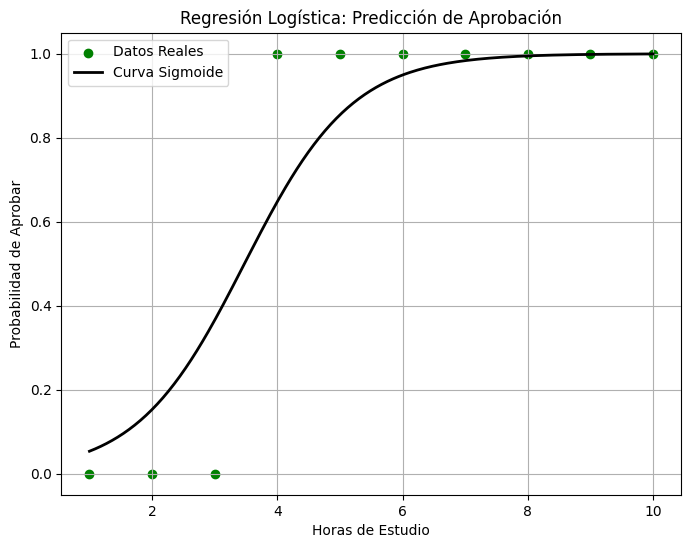

In [18]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Datos de ejemplo: Horas de estudio vs Aprobar/Reprobar
data = {
    'Horas_Estudio': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Aprobó': [0, 0, 0, 1, 1, 1, 1, 1, 1, 1]  # 0 = Reprobó, 1 = Aprobó
}

df = pd.DataFrame(data)

# Variables dependiente e independiente
X = df[['Horas_Estudio']]
y = df['Aprobó']

# Crear y entrenar el modelo
modelo_logistico = LogisticRegression()
modelo_logistico.fit(X, y)

# Predicciones
y_pred = modelo_logistico.predict(X)

# Graficar datos y curva sigmoide
plt.figure(figsize=(8,6))
plt.scatter(df['Horas_Estudio'], df['Aprobó'], color='green', label='Datos Reales')

# Crear una línea suave para la curva sigmoide
horas_range = np.linspace(1, 10, 300).reshape(-1, 1)
probabilidades = modelo_logistico.predict_proba(horas_range)[:, 1]

plt.plot(horas_range, probabilidades, color='black', linewidth=2, label='Curva Sigmoide')
plt.xlabel('Horas de Estudio')
plt.ylabel('Probabilidad de Aprobar')
plt.title('Regresión Logística: Predicción de Aprobación')
plt.legend()
plt.grid(True)
plt.show()
